<a href="https://colab.research.google.com/github/ducdonghiem/HUST/blob/main/sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/sudoku.csv/sudoku.csv')
df.head()

,quizzes,solutions
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...


In [ ]:
!nvidia-smi

Mon Jan  2 15:15:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement gpu (from versions: none)
ERROR: No matching distribution found for gpu


In [13]:
df.shape

(1000000, 2)

In [ ]:
x, y = [np.array([int(j) for j in i]) for i in list(df['quizzes'])], [np.array([int(j) for j in i]) for i in list(df['solutions'])]
x, y = np.array(x), np.array(y)

print(x[0], y[0])
print(x.shape, type(x))
print(y.shape, type(y))

[0 0 4 3 0 0 2 0 9 0 0 5 0 0 9 0 0 1 0 7 0 0 6 0 0 4 3 0 0 6 0 0 2 0 8 7 1
 9 0 0 0 7 4 0 0 0 5 0 0 8 3 0 0 0 6 0 0 0 0 0 1 0 5 0 0 3 5 0 8 6 9 0 0 4
 2 9 1 0 3 0 0] [8 6 4 3 7 1 2 5 9 3 2 5 8 4 9 7 6 1 9 7 1 2 6 5 8 4 3 4 3 6 1 9 2 5 8 7 1
 9 8 6 5 7 4 3 2 2 5 7 4 8 3 9 1 6 6 8 9 7 3 4 1 2 5 7 1 3 5 2 8 6 9 4 5 4
 2 9 1 6 3 7 8]
(1000000, 81) <class 'numpy.ndarray'>
(1000000, 81) <class 'numpy.ndarray'>


In [ ]:
x = x.reshape(-1, 9, 9, 1)
y = y.reshape(-1, 9, 9) - 1

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(800000, 9, 9, 1) (800000, 9, 9) (200000, 9, 9, 1) (200000, 9, 9)


In [17]:
model = keras.Sequential([
    layers.Conv2D(128, 3, activation = 'relu', padding = 'same', input_shape = (9 , 9 ,1)),
    layers.BatchNormalization(),
    layers.Conv2D(128, 3, activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, 3, activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, 3, activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.Conv2D(512, 3, activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.Conv2D(1024, 3, activation = 'relu', padding = 'same'),
    layers.BatchNormalization(),
    layers.Conv2D(9, 1, activation = 'relu', padding = 'same'),
    layers.Flatten(),
    layers.Dense(512),
    layers.Dense(81*9),
    layers.LayerNormalization(axis = -1),
    layers.Reshape((9, 9, 9)),
    layers.Activation('softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 9, 9, 128)         1280      
                                                                 
 batch_normalization_13 (Bat  (None, 9, 9, 128)        512       
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 9, 9, 128)         147584    
                                                                 
 batch_normalization_14 (Bat  (None, 9, 9, 128)        512       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 9, 9, 256)         295168    
                                                                 
 batch_normalization_15 (Bat  (None, 9, 9, 256)       

In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 64, epochs = 100, callbacks=[callback], verbose = 2)

Epoch 1/100
12500/12500 - 725s - loss: 0.5814 - accuracy: 0.7897 - val_loss: 0.2721 - val_accuracy: 0.9008 - 725s/epoch - 58ms/step
Epoch 2/100
12500/12500 - 717s - loss: 0.2144 - accuracy: 0.9224 - val_loss: 0.1818 - val_accuracy: 0.9344 - 717s/epoch - 57ms/step
Epoch 3/100
12500/12500 - 716s - loss: 0.1551 - accuracy: 0.9442 - val_loss: 0.1473 - val_accuracy: 0.9470 - 716s/epoch - 57ms/step
Epoch 4/100
12500/12500 - 715s - loss: 0.1275 - accuracy: 0.9542 - val_loss: 0.1306 - val_accuracy: 0.9531 - 715s/epoch - 57ms/step
Epoch 5/100
12500/12500 - 742s - loss: 0.1102 - accuracy: 0.9604 - val_loss: 0.1202 - val_accuracy: 0.9570 - 742s/epoch - 59ms/step
Epoch 6/100
12500/12500 - 742s - loss: 0.0976 - accuracy: 0.9649 - val_loss: 0.1138 - val_accuracy: 0.9593 - 742s/epoch - 59ms/step
Epoch 7/100
12500/12500 - 714s - loss: 0.0874 - accuracy: 0.9685 - val_loss: 0.1112 - val_accuracy: 0.9605 - 714s/epoch - 57ms/step
Epoch 8/100
12500/12500 - 742s - loss: 0.0790 - accuracy: 0.9716 - val_loss:

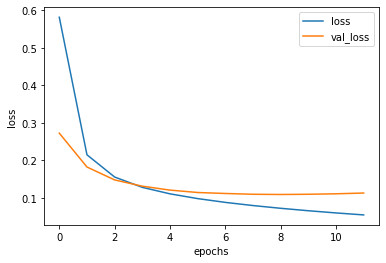

In [19]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

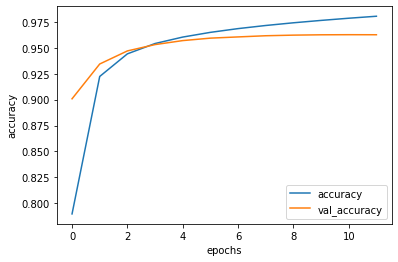

In [20]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [28]:
test_puzzle = np.array([
       [0, 0, 0, 0, 7, 9, 5, 0, 6],
       [8, 0, 0, 0, 3, 5, 9, 0, 1],
       [0, 4, 0, 0, 6, 0, 7, 3, 0],
       [1, 0, 0, 5, 0, 0, 6, 0, 0],
       [0, 3, 9, 0, 2, 0, 0, 0, 4],
       [0, 8, 6, 0, 4, 0, 0, 9, 0],
       [0, 0, 1, 2, 0, 0, 0, 8, 0],
       [4, 7, 0, 0, 0, 0, 3, 5, 0],
       [0, 0, 2, 7, 8, 0, 0, 0, 0]])
solution = np.array([
       [2, 1, 3, 8, 7, 9, 5, 4, 6],
       [8, 6, 7, 4, 3, 5, 9, 2, 1],
       [9, 4, 5, 1, 6, 2, 7, 3, 8],
       [1, 2, 4, 5, 9, 8, 6, 7, 3],
       [5, 3, 9, 6, 2, 7, 8, 1, 4],
       [7, 8, 6, 3, 4, 7, 2, 9, 5],
       [6, 9, 1, 2, 5, 3, 4, 8, 7],
       [4, 7, 8, 9, 1, 6, 3, 5, 2],
       [3, 5, 2, 7, 8, 4, 1, 6, 9]])

In [29]:
predict = model.predict(test_puzzle.reshape(1,9, 9, 1)).argmax(axis = -1).squeeze() + 1
predict

1/1 [==============================] - 0s 16ms/step


array([[2, 1, 3, 4, 7, 9, 5, 4, 6],
       [8, 6, 7, 4, 3, 5, 9, 2, 1],
       [9, 4, 5, 1, 6, 2, 7, 3, 8],
       [1, 2, 4, 5, 9, 8, 6, 7, 3],
       [5, 3, 9, 6, 2, 6, 8, 1, 4],
       [7, 8, 6, 3, 4, 7, 2, 9, 5],
       [6, 9, 1, 2, 5, 3, 4, 8, 7],
       [4, 7, 8, 9, 1, 6, 3, 5, 2],
       [3, 5, 2, 7, 8, 4, 1, 6, 9]])

In [30]:
print(solution - predict)

[[0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


In [31]:
model.save('/content/drive/MyDrive/saved_models/sudoku.hdf5')